In [ ]:
# Standard useful data processing imports
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Keras Imports - CNN
from keras.models import Sequential
import keras.backend as K
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Lambda, LSTM
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [ ]:
#Working Directory
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/minor'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
 chaman.jpeg		 data.csv       minor_synop_new.docx   model_weights.h5
 correction_code.ipynb	 kamal.jpeg     minor_synop_new.gdoc   synp_front.docx
'data (1).csv'		 minor3.ipynb   model.h5	       synp_front.gdoc


In [ ]:
#Loading the data
path='drive/My Drive/minor/data (1).csv'
data = pd.read_csv(path)

In [ ]:
data.shape

(72000, 1025)

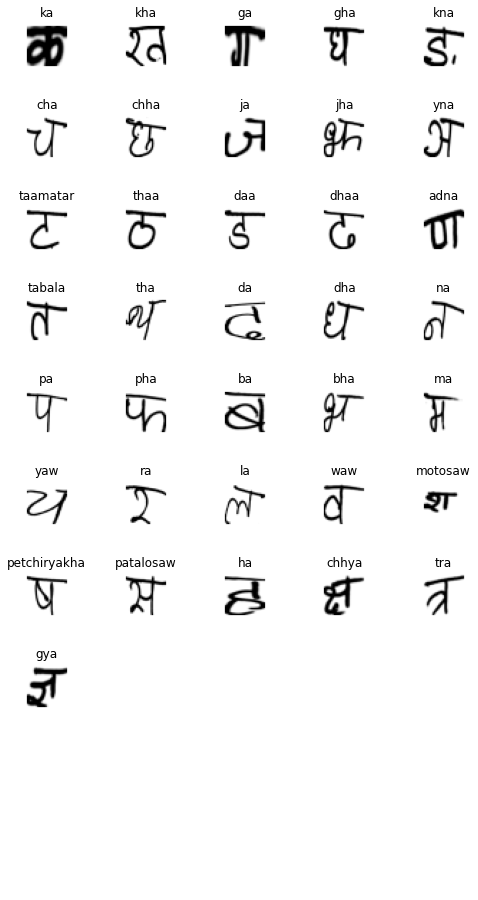

In [ ]:
char_names = data.character.unique()  
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()


In [ ]:
X = data.values[:,:-1]/255.0
Y = data["character"].values

In [ ]:
#Let us minimize the memory consumption
del data
n_classes = 36

In [ ]:
# Let's split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [ ]:
img_height_rows = 32
img_width_cols = 32

In [ ]:
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

In [ ]:
x_train.shape

(50400, 32, 32, 1)

In [ ]:

#CNN Model - Sequential Modelling

In [ ]:
cnn = Sequential()

In [ ]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [ ]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=32, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)


# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [ ]:
#Adding few more layers of convnet and maxpool
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)


pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)



In [ ]:
# Add the next Convolutional+Activation layer
ip_conv_2_1 = Conv2D(filters=32, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_2_1)
ip_conv_2_2 = Conv2D(filters=32, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_2_2)

# Add the Pooling layer
pool_2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_2)



In [ ]:
# Let's deactivate around 30% of neurons randomly for training
drop_layer_0 = Dropout(0.3)
cnn.add(drop_layer_0)
cnn.add(Lambda(lambda x: K.squeeze(x, 1)))

In [ ]:
cnn.add( (LSTM(256, return_sequences=True)))
cnn.add( (LSTM(256)))

In [ ]:
#Adding the flatten layer
flat_layer_0 = Flatten()
#cnn.add(Flatten())

In [ ]:
# Now add the Dense layers
h_dense_0 = Dense(units=2048, activation=ip_activation, kernel_initializer='uniform')
#cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=256, activation=ip_activation, kernel_initializer='uniform')
#cnn.add(h_dense_1)


In [ ]:
#Addng the last layer(Softmax)
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [ ]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [ ]:

print(cnn.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 3, 3, 32)        

In [ ]:
history = cnn.fit(x_train, y_train,
                  batch_size=32, epochs=20,
                  validation_data=(x_test, y_test))

Train on 50400 samples, validate on 21600 samples
Epoch 1/20
50400/50400 [==============================] - 39s 772us/step - loss: 1.5600 - accuracy: 0.5086 - val_loss: 0.4986 - val_accuracy: 0.8471
Epoch 2/20
50400/50400 [==============================] - 39s 766us/step - loss: 0.5993 - accuracy: 0.8118 - val_loss: 0.3235 - val_accuracy: 0.9015
Epoch 3/20
50400/50400 [==============================] - 38s 745us/step - loss: 0.3921 - accuracy: 0.8782 - val_loss: 0.2288 - val_accuracy: 0.9312
Epoch 4/20
50400/50400 [==============================] - 38s 758us/step - loss: 0.3007 - accuracy: 0.9079 - val_loss: 0.2210 - val_accuracy: 0.9354
Epoch 5/20
50400/50400 [==============================] - 38s 759us/step - loss: 0.2406 - accuracy: 0.9264 - val_loss: 0.1373 - val_accuracy: 0.9613
Epoch 6/20
50400/50400 [==============================] - 38s 749us/step - loss: 0.1998 - accuracy: 0.9390 - val_loss: 0.1393 - val_accuracy: 0.9613
Epoch 7/20
50400/50400 [==============================] 

In [ ]:
#printing the accuracy of the trained dataset
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 97.50%


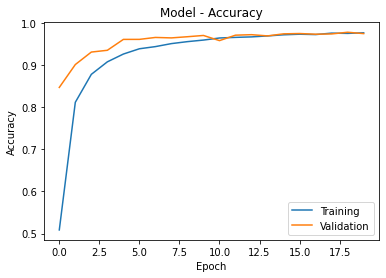

In [ ]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

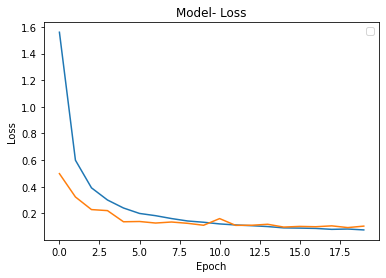

In [ ]:

# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
#Loading the required libraries for uplading the trained model on drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
# 2. Save Keras Model or weights on google drive
# create on Colab directory
cnn.save('model.h5')    
model_file = drive.CreateFile({'title' : 'model.h5'})
model_file.SetContentFile('model.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

In [ ]:
# To delete the rained model
 del cnn

In [ ]:
# 3. reload the trained model from google drive into the model
from tensorflow import keras
# use (get shareable link) to get file id
last_model_file = drive.CreateFile({'id': '1YY7WBiEf_sfEzikN9Lv9abndnkU0pNT3'}) 
last_model_file.GetContentFile('model.h5')
cnn = keras.models.load_model('model.h5')

In [ ]:
# Print the acuraacy of loaded model
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 98.09%


In [ ]:
# Print the acuraacy of loaded model
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 98.09%


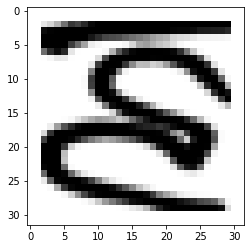

In [ ]:
# TO see the character on 30th position
a = np.array(x_test[23], dtype=float)
plt.imshow(a.reshape(32,32), cmap="binary")

In [ ]:
cnn.predict(x_test[23].reshape(1,32,32,1)).argmax()

32

In [ ]:
y_test[23].argmax()

32

In [ ]:
char_list='कखगघङचछजझञटठडढणतथदधनपफबभमयरलवशषसह'
char_dict={}
for i in range(len(char_list)):
  char_dict[i]=char_list[i]
char_dict.get(6)  
char_dict[33]='क्ष'
char_dict[34]='त्र'
char_dict[35]='ज्ञ'

In [ ]:
char_dict.get(33)

'क्ष'

In [ ]:
# Standard useful data processing imports
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

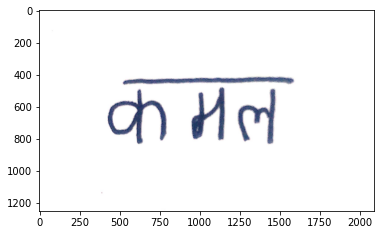

In [ ]:
img = mpimg.imread('/content/drive/My Drive/minor/kamal.jpeg')
plt.imshow(img)

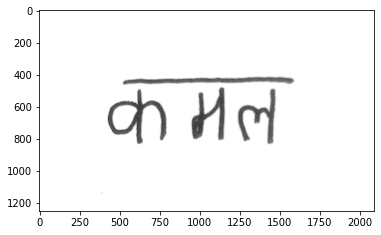

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

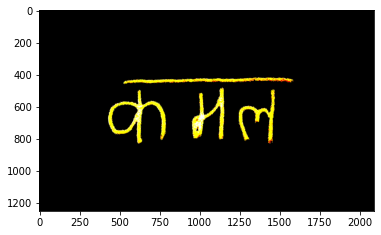

In [ ]:
#converting to binarized image
ret, thresh_img = cv2.threshold(img, 100,255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_img, cmap='gray')

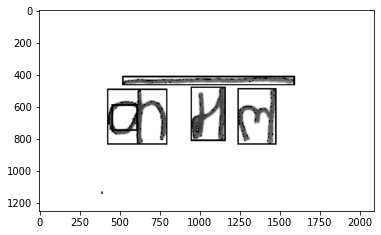

In [ ]:
# Segmenting the grayscale word to bounding box
h, w = img.shape[:2]
image_size = h*w
mser = cv2.MSER_create()
mser.setMaxArea(int(image_size/2))
mser.setMinArea(10)

gray_copy = np.copy(gray)

regions, rects = mser.detectRegions(gray_copy)
for (x, y, w, h) in rects:
    cv2.rectangle(gray_copy, (x, y), (x+w, y+h), color=(0, 0, 255), thickness=2)
#plot of the image
plt.imshow(gray_copy, cmap='gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


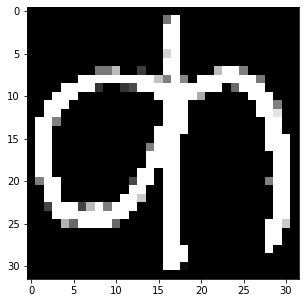

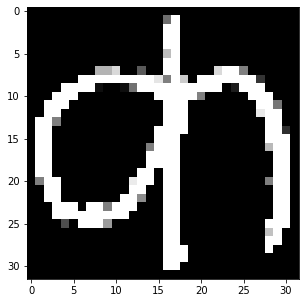

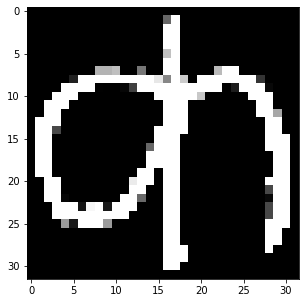

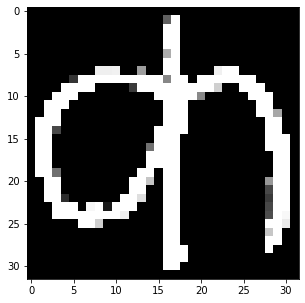

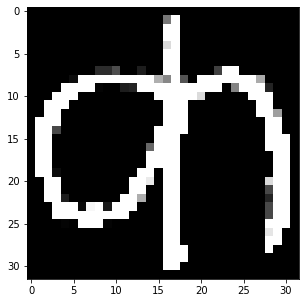

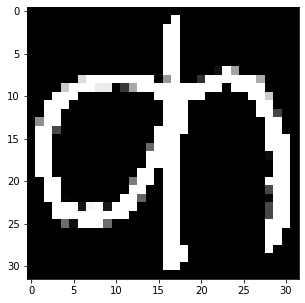

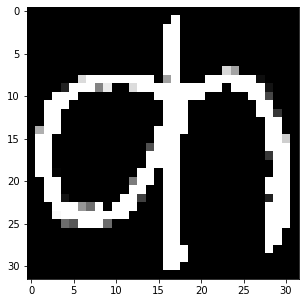

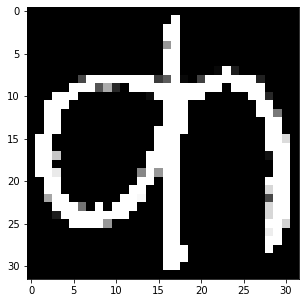

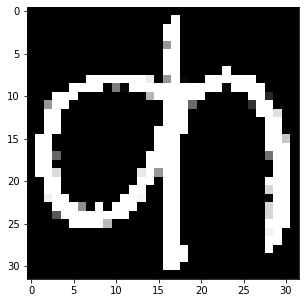

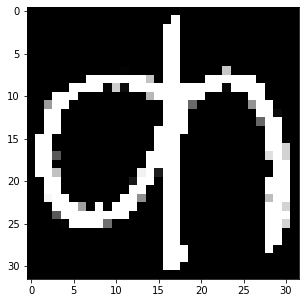

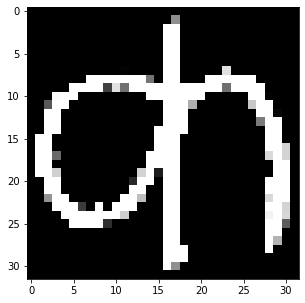

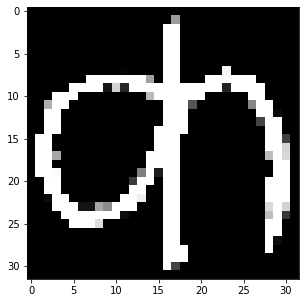

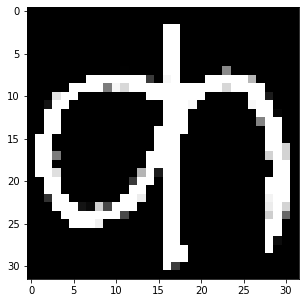

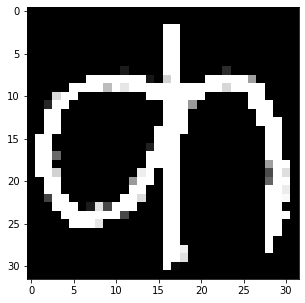

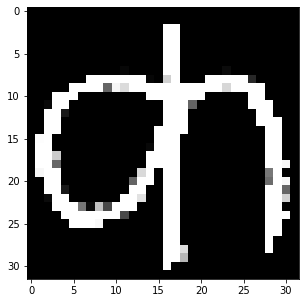

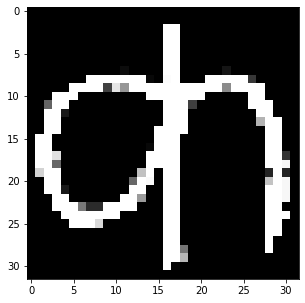

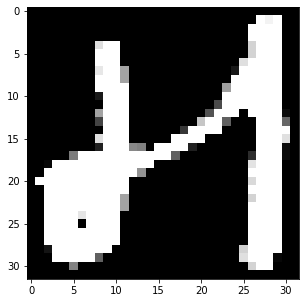

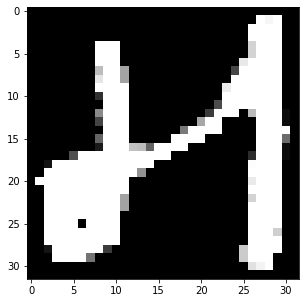

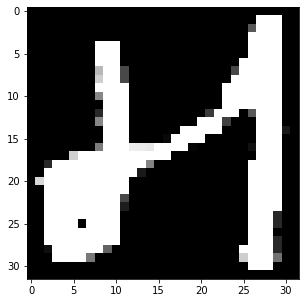

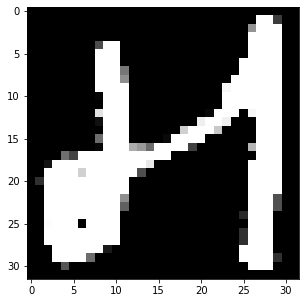

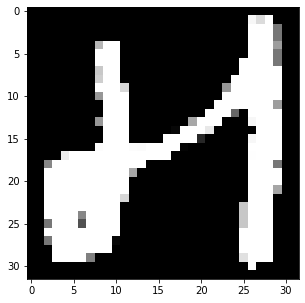

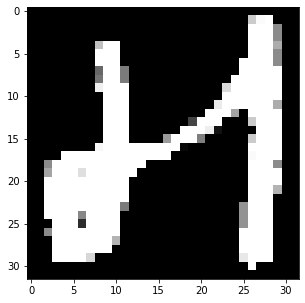

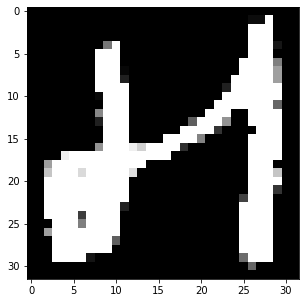

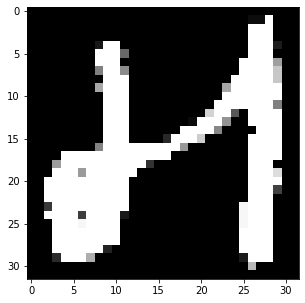

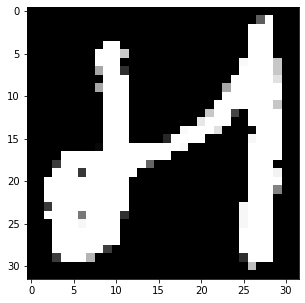

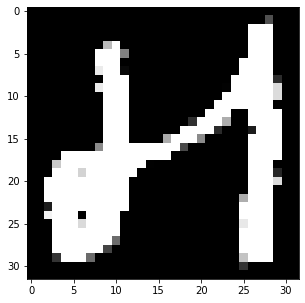

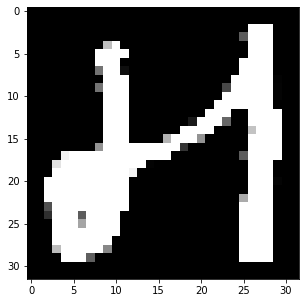

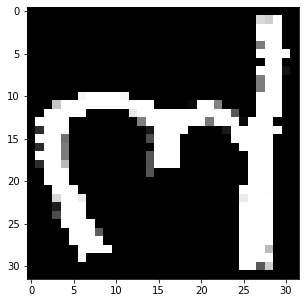

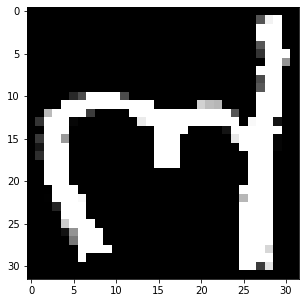

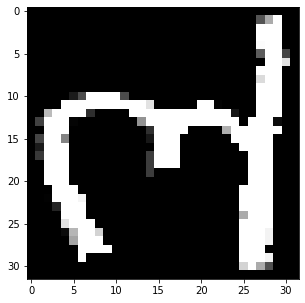

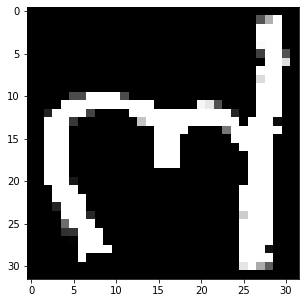

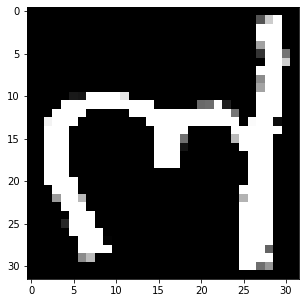

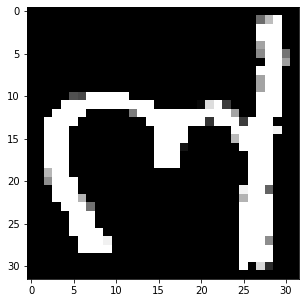

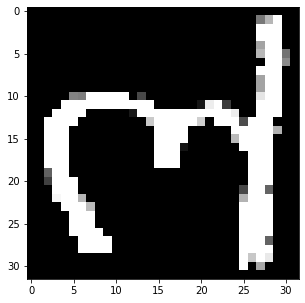

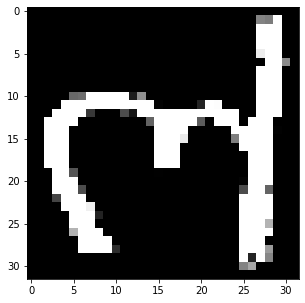

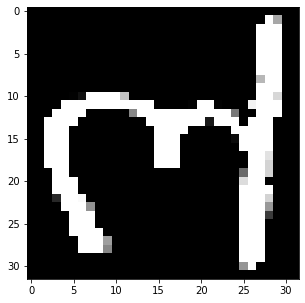

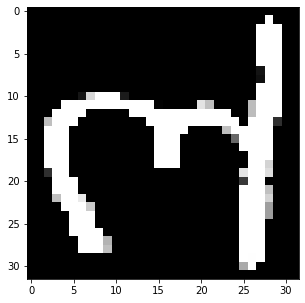

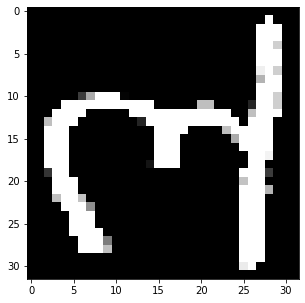

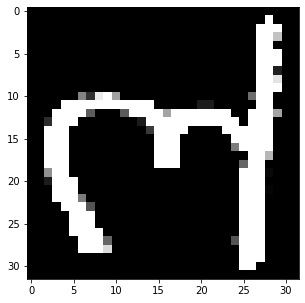

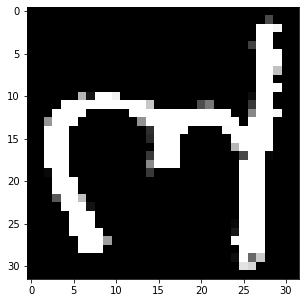

In [ ]:
# visualization of each bounded characters
images = []
crop_img1= gray
for i in range(len(rects)):
    if rects[i][3] >= 200 and rects[i][2] >= 200 and crop_img1.shape != gray[rects[i][1]-10:rects[i][1]+rects[i][3]+10, rects[i][0]-10:rects[i][0]+rects[i][2]+10].shape :
        crop_img1 = gray[rects[i][1]-10:rects[i][1]+rects[i][3]+10, rects[i][0]-10:rects[i][0]+rects[i][2]+10]
        ret, thresh_img = cv2.threshold(crop_img1, 127, 255, cv2.THRESH_BINARY_INV)
        crop_img = cv2.resize(thresh_img, (32,32))
        images.append(crop_img)

for i in range(len(images)):
    
    plt.figure(figsize=(5,5))
    plt.imshow(images[i], cmap='gray')

In [ ]:
# post processing of the segmented characters
images_copy = np.asarray(images, np.float)
images_copy = images_copy.reshape(len(images_copy), 32, 32, 1)
images_copy /= 255
pred=cnn.predict(images_copy)
import pandas as pd
pred_dataframe = pd.DataFrame(pred)

In [ ]:
final_pred=pred_dataframe.idxmax(axis = 1).unique()

In [ ]:
word=''
for i in final_pred:
  word += str(char_dict[int(i)])

In [ ]:
word

'कमल'